### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
claims = pd.read_csv('claims.csv')
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [8]:
claims.shape

(1100, 10)

In [29]:
cust_demographics = pd.read_csv('C:/Python/Class/Exercise/Exercise/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')
cust_demographics.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [11]:
cust_demographics.shape

(1085, 6)

In [30]:
insurance = pd.merge(left = claims,
            right = cust_demographics,
            left_on = 'customer_id',
            right_on = 'CUST_ID')

insurance.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [27]:
insurance.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [20]:
insurance.describe()

,claim_id,customer_id,total_policy_claims,CUST_ID
count,1.085000e+03,1.085000e+03,1075.000000,1.085000e+03
mean,4.891553e+07,5.076790e+07,1.586977,5.076790e+07
std,2.912818e+07,2.849625e+07,1.146859,2.849625e+07
min,2.683200e+04,1.545570e+05,1.000000,1.545570e+05
25%,2.404606e+07,2.645062e+07,1.000000,2.645062e+07
50%,4.855975e+07,4.975949e+07,1.000000,4.975949e+07
75%,7.404400e+07,7.609396e+07,2.000000,7.609396e+07
max,9.977548e+07,9.996199e+07,8.000000,9.996199e+07


### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [46]:
insurance['claim_amount'] = insurance['claim_amount'].str.replace('$',' ').astype(float)

insurance.dtypes

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [222]:
insurance['alert'] = np.where(insurance['police_report'] == 'Yes',1,0)
insurance.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert,Age,Age_group,claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.17,Adult,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0,50.17,Adult,10


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [59]:
insurance = insurance.drop_duplicates(subset = 'CUST_ID',keep = 'last')

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [61]:
insurance.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
alert                   0
dtype: int64

In [85]:
# filling continuous variable
insurance['claim_amount'] = insurance['claim_amount'].fillna(insurance['claim_amount'].mean())

# filling categorical variable
insurance['total_policy_claims']  = insurance['total_policy_claims'].fillna(insurance['total_policy_claims'].mode()[0])

In [88]:
insurance.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
alert                  0
dtype: int64

### 7. Calculate the age of customers in years. 
### Based on the age, categorize the customers according to the below criteria 
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [134]:
# get current date
today = pd.datetime.today().date()
today = pd.to_datetime(today) # ensures that we have pandas datetime64[]

# get current year
curr_yr = today.year
insurance['DateOfBirth'] = pd.to_datetime(insurance['DateOfBirth']) # ensures that we have pandas datetime64[]
# corrected century
insurance['DateOfBirth'] = np.where(insurance['DateOfBirth'].dt.year > curr_yr , insurance['DateOfBirth']- pd.DateOffset(years=100), insurance['DateOfBirth'])

insurance ['Age'] = (today - insurance['DateOfBirth']).dt.days # calculate age in days
insurance ['Age'] =round(insurance['Age']/365.25,2) # converted to year
age = insurance ['Age']

insurance ['Age_group'] = np.where (age < 18, 'Children', np.where((age > 18) & (age < 30), 'Youth', np.where((age > 30) & (age < 60), 'Adult', 'Senior')))

insurance.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert,Age,Age_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.17,Adult
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0,50.17,Adult
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,36.01,Adult
5,91609100,47830476,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,33.88,Adult
7,39219616,19269962,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,42.84,Adult


### 8.What is the average amount claimed by the customers from various segments?

In [136]:
insurance.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12846.386178
Platinum,12371.644999
Silver,12267.146560


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [148]:
insurance[insurance['claim_date'] < '11/09/2018'].groupby('incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,6.667884e+05
Driver error,3.274090e+06
Natural causes,1.330729e+06
Other causes,3.873430e+06
Other driver error,3.216782e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [161]:
len(insurance[(insurance['State'].isin(['TX','DE','AK'])) & 
              (insurance['incident_cause'].isin(['Driver error','Other driver error'])) 
              & (insurance['Age_group'] == 'Adult')])

29

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

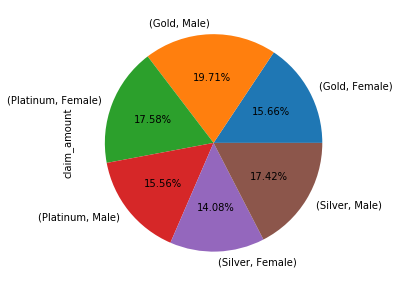

In [167]:
pie = insurance.groupby(['Segment','gender'])[['claim_amount']].sum()
pie.plot(kind="pie",subplots=True,legend=False,figsize=(13,5),autopct="%.2f%%")
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

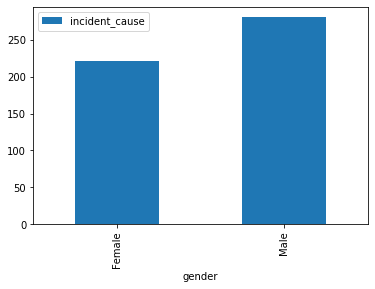

In [179]:
# get count based on gender
bar = insurance[insurance['incident_cause'].isin(['Driver error','Other driver error'])].groupby('gender')[['incident_cause']].count()

#plotting
bar.plot(kind = 'bar')
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

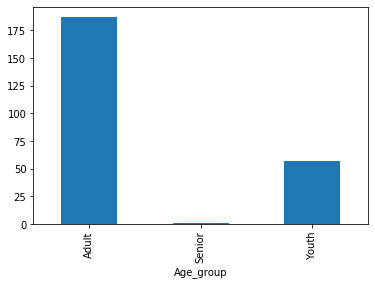

In [183]:
# get count based on age group
fraud = insurance[insurance['fraudulent'] == 'Yes'].groupby('Age_group')['claim_id'].count()

#plotting
fraud.plot(kind = 'bar')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

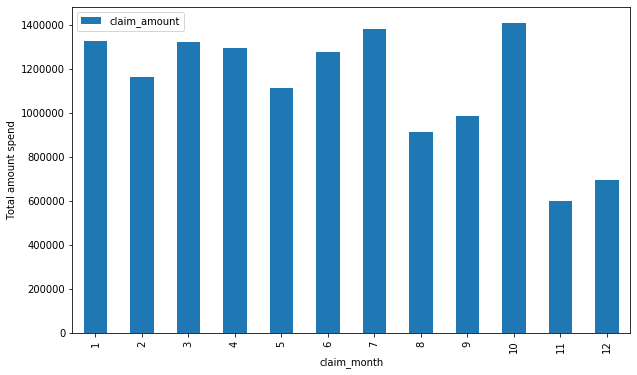

In [197]:
insurance['claim_date'] = pd.to_datetime(insurance['claim_date']) # converted to datetime
insurance['claim_month'] = insurance['claim_date'].dt.month # fetched month

#plotting
insurance.groupby('claim_month')[['claim_amount']].sum().plot(kind = 'bar', figsize=(10,6))
plt.ylabel('Total amount spend')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

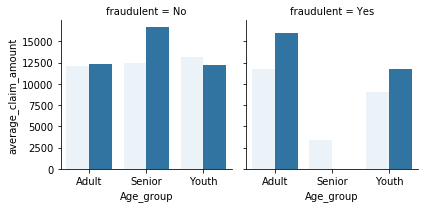

In [257]:
data = insurance.groupby(['gender','Age_group','fraudulent'])[['claim_amount']].mean().reset_index()

g = sns.FacetGrid(average_claim_amount,col="fraudulent")

g = g.map(sns.barplot, "Age_group", "average_claim_amount", "gender")
graph.add_legend()
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.
### 16. Is there any similarity in the amount claimed by males and females?

In [228]:
# sample 1 as claim amount by male
male = insurance[insurance['gender'] == 'Male']['claim_amount']
# sample 1 as claim amount by male
female = insurance[insurance['gender'] == 'Female']['claim_amount']

In [230]:
print("The average claim amount by the male customers is ${}".format(male.mean()))
print("The average claim amount by the female customers is ${}".format(female.mean()))

The average claim amount by the male customers is $12884.829631308425
The average claim amount by the female customers is $12100.692029236623


In [235]:
# Step 3
import scipy.stats as stats

# considering male and female having equal variance
eq_var = stats.ttest_ind(a= male, b= female, equal_var=True)
eq_var.statistic # fetch T value

0.9630529881732577

In [237]:
# considering male and female having unequal variance
uneq_var = stats.ttest_ind(a= male, b= female, equal_var=False)
uneq_var.statistic # fetch T value

0.9637241707490979

In [239]:
# We'll cosider equal variance since the t score is not having a huge difference
uneq_var.statistic - eq_var.statistic

0.0006711825758402012

In [242]:
# Step 4: Since p_vale is more than 0.05,we fail to reject the NULL hypothesis
eq_var.pvalue > 0.05

True

Step 5: Conclusion:
Since the significance value of the test is greater than 0.05, we can conclude that there is a similarity between 
amount claimed by males and females

### 17. Is there any relationship between age category and segment?

In [245]:
agecat_seg_xtab = pd.crosstab(insurance.Age_group, insurance.Segment, margins = True)
agecat_seg_xtab 

Segment,Gold,Platinum,Silver,All
Age_group,,,,
Adult,283,259,257,799
Senior,2,3,1,6
Youth,86,99,88,273
All,371,361,346,1078


In [249]:
x2test = stats.chi2_contingency(observed= agecat_seg_xtab)
print("The chi square stat is {} and the p value is {}".format(x2test[0],x2test[1]))

The chi square stat is 2.7482669699330446 and the p value is 0.9734451604059676


In [251]:
x2test[1] > 0.05

True

 Conclusion: 
Since p_value is more we fail reject the null hypothesis. 
Therefore there is no relationship between age category and segment.

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was  $10,000.

In [279]:
#Here, current year - 2017-2018
#Parameters taken into consideration are claim amount from 2017-04-01 to 2018-03-31

claim_amt_curr_yr = insurance[(insurance['claim_date'] >  pd.to_datetime('2017-03-31')) & (insurance['claim_date'] <  pd.to_datetime('2018-04-01'))]['claim_amount']
claim_amt_curr_yr.mean()

12959.00377924115

Step 1 : Define the null and alt hypothesis

 Ho: Average current year(2017-2018) claim amount = $10,000 
              there is no increase in claim amount.
 H1: Average current year claim amount(2017-2018) > $10,000
              there is increase in claim amount.


Step 2 : we are comparing current year claim amount with last year mean value, so statistical method used is One Sample T-Test

In [285]:
# Step 3:

test = stats.ttest_1samp(a=claim_amt_curr_yr, popmean = 10000)

t_score = round(test.statistic,2)
p_value = test.pvalue

# CI : 0.95 or 95%
# alpha = 0.05
# if p value < alpha then rject NULL and 
# if it is >= alpha, we fail to reject NULL

print("The p value is {} and the T Score is {}".format(p_value,t_score))

The p value is 3.334746152573521e-07 and the T Score is 5.16


#Step 4 : Since p_value is less than 0.05 we reject the NULL Hypothesis
p_value > 0.05

Step 5: 
Conclusion - There has been significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

### 19. Is there any difference between age groups and insurance claims?

age groups(Adult,Children Senior, Youth) = Categorical var
Insurance claim = Continuous var

In [299]:
age_Adult = insurance[insurance['Age_group'] == 'Adult']['claim_amount']
age_Child = insurance[insurance['Age_group'] == 'Children']['claim_amount']
age_Senior = insurance[insurance['Age_group'] == 'Senior']['claim_amount']
age_Youth = insurance[insurance['Age_group'] == 'Youth']['claim_amount']

# Since we have 3 samples of categorical value, we will be using Annova statistical method

In [300]:
age_Child

#Since age group childern has no data so we will ignore this age group

Series([], Name: claim_amount, dtype: float64)

In [ ]:
# Define the null and alt hypothesis
H0 = Adult insurance claim = Senior insurance claim = Youth insurance claim
H1 = Adult insurance claim != Senior insurance claim != Youth insurance claim

In [303]:
# Perform the ANOVA
aov = stats.f_oneway(age_Adult,age_Senior,age_Youth)

# Statistic :  F Value
print("The f-value is {} and the p value is {}".format(aov.statistic,aov.pvalue))

The f-value is 0.06345285434681947 and the p value is 0.9385218801404894


In [306]:
aov.pvalue > 0.05

# Since p_value is greater than 0.05 we fail to reject the NULL Hypothesis

True

Conclusion : There is no difference in insurance claim amount for different age groups.

### 20. Is there any relationship between total number of policy claims and the claimed amount?

policy claim and claim amount both are continous variable and we have to find relationship between 2 categorical variable 
which can be checked by corelation between them.

In [309]:
print(np.corrcoef(insurance['total_policy_claims'], insurance['claim_amount']))

[[ 1.         -0.02239272]
 [-0.02239272  1.        ]]


In [311]:
print(stats.pearsonr(insurance['total_policy_claims'], insurance['claim_amount']))

(-0.02239272073209992, 0.46267007422691225)


Since corr value is -0.02 which is close to zero, we can conclude that there is no relationship between total number of policy claims and the claimed amount.

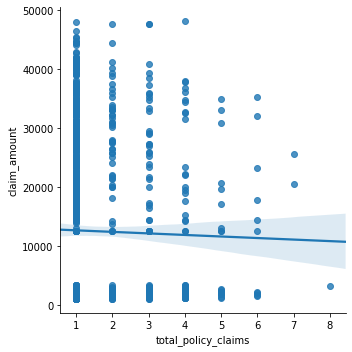

In [313]:
#We can also plot this
sns.lmplot(x = 'total_policy_claims', y = 'claim_amount', data = insurance)